In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
import itertools

array([[   0,   41],
       [ -77,   16],
       [ -77,  -17],
       [   0,  -41],
       [  76,  -17],
       [  76,   16],
       [   0,   83],
       [-105,   64],
       [-153,   33],
       [-166,   -1],
       [-153,  -34],
       [-105,  -65],
       [   0,  -83],
       [ 104,  -65],
       [ 152,  -34],
       [ 166,    0],
       [ 152,   33],
       [ 104,   64],
       [   0,  125],
       [-118,  110],
       [-189,   82],
       [-230,   50],
       [-248,   16],
       [-248,  -17],
       [-230,  -51],
       [-189,  -83],
       [-118, -111],
       [   0, -125],
       [ 117, -111],
       [ 188,  -83],
       [ 229,  -51],
       [ 247,  -17],
       [ 247,   16],
       [ 229,   50],
       [ 188,   82],
       [ 117,  110],
       [   0,  166],
       [-124,  154],
       [-211,  128],
       [-268,   98],
       [-306,   66],
       [-327,   33],
       [-333,   -1],
       [-327,  -34],
       [-306,  -67],
       [-268,  -99],
       [-211, -129],
       [-124,

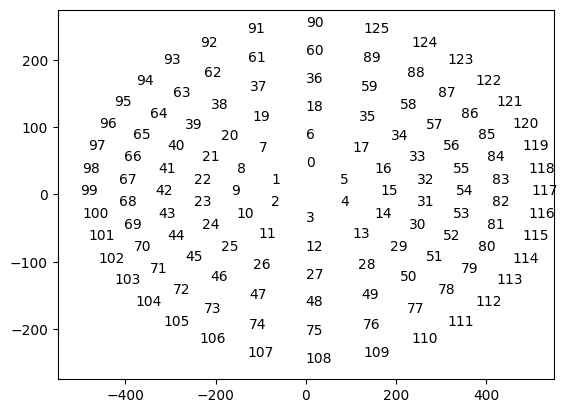

In [11]:
x_range, y_range, layers, divide_number = 1000, 500, 6, 6

def get_points(x_range, y_range, layers, divide_number):
    ar, br, Lyr, dvn = x_range, y_range, layers, divide_number
    ar_list, br_list, Lyr_list, dvn_list =\
      np.floor([((n+1)*ar/2)/Lyr for n in range(Lyr-1)] + [ar/2]),\
      np.floor([((n+1)*br/2)/Lyr for n in range(Lyr-1)] + [br/2]),\
      np.floor(range(1, Lyr+1)), np.floor([dvn*(n+1) for n in range(Lyr)])

    ar_list, br_list, Lyr_list, dvn_list =\
      map(int, ar_list), map(int, br_list), map(int, Lyr_list), map(int, dvn_list)

    def get_points_pxy(ar, br, Lyr, dvn):
        def getArcLengthDiff(radian1, radian2):
            y = lambda x: np.sqrt((ar * np.cos(x))**2 + (br * np.sin(x))**2)
            integ = integrate.quad(y, radian1, radian2)
            return integ[0]

        L = getArcLengthDiff(0, 2* np.pi)
        d = L / dvn
        radian_list, radian_prev, radian_end = [np.pi/2], np.pi/2, 5 * np.pi /2
        r1, r2 = np.pi/2, radian_end

        for i in range(dvn-1):
            while(True):
                if r2 - r1 < math.pow(10, -10):
                    radian_list.append(r2)
                    radian_prev = r2
                    r1 = r2
                    r2 = radian_end
                    break

                midium = r2 + (r1 - r2)/2
                arc = getArcLengthDiff(radian_prev, midium)
                if arc < d:
                    r1 = midium
                else:
                    r2 = midium
        pxy = []
        for radiam in radian_list:
          pxy.append((ar*math.cos(radiam), br*math.sin(radiam)))
        return pxy

    xyresult = []
    for a, b, c, d in zip(ar_list, br_list, Lyr_list, dvn_list):
      xyresult.append(get_points_pxy(ar=a, br=b, Lyr=c, dvn=d))
    #print(xyresult)

    xyresult_chain = list(itertools.chain.from_iterable(xyresult))
    xyresult_chain = list(itertools.chain.from_iterable(xyresult_chain))
    #print(xyresult_chain)

    xresult_chain = xyresult_chain[0::2]
    xresult_chain = list(map(lambda x: math.floor(x), xresult_chain))

    yresult_chain = xyresult_chain[1::2]
    yresult_chain = list(map(lambda x: math.floor(x), yresult_chain))

    xy_chain = [xresult_chain, yresult_chain]

    points = []
    for a, b in zip(xresult_chain, yresult_chain):
       points.append([a, b])

    points = np.array(points)


    plt.plot(points[:,0], points[:,1], 'ro', alpha = 0.0)
    for i in range(points.shape[0]):
      plt.text(points[i,0], points[i,1], str(i))


    return points

get_points(x_range, y_range, layers, divide_number)